<a href="https://colab.research.google.com/github/Abhikritpatel/vomitoxin_prediction/blob/main/ML_intern_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.DATA EXPLORING AND PREPROCESSING

IMPORTING THE CSV AND LIBRARIES

INSTALL THIS MODULE AS WE WILL USE IT FOR HYPERPARAMETER TUNING LATER ON

In [80]:
!pip install keras-tuner -q

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df=pd.read_csv('/content/drive/MyDrive/TASK-ML-INTERN.csv')
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [108]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [110]:
df.shape

(500, 450)

CHECKING FOR NULL VALUES

In [111]:
null_values=df.isnull().sum().sum()
null_values

0

DROPPING THE ID COLUMN(AS ITS OF NO USE)

In [112]:
df=df.drop(columns='hsi_id')

CHECKINGT THE DISTRIBUTION OF VOMITOXIN

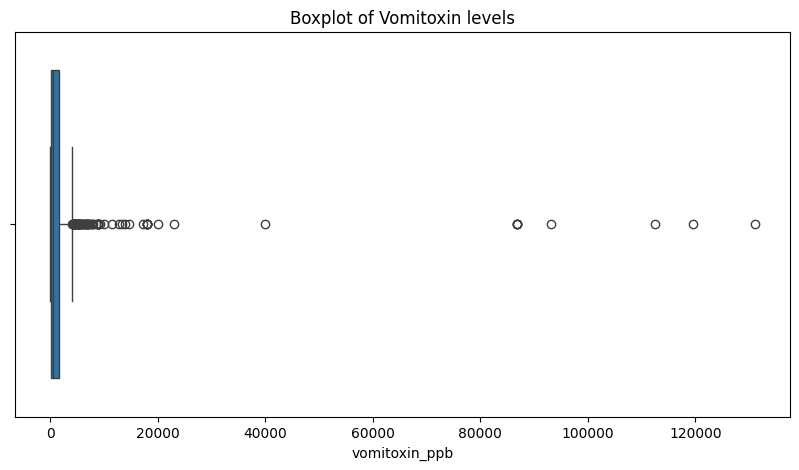

In [113]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['vomitoxin_ppb'])
plt.title("Boxplot of Vomitoxin levels")
plt.show()

SEEING THE DISTRIBUTION OF FIRST 5 FEATURES

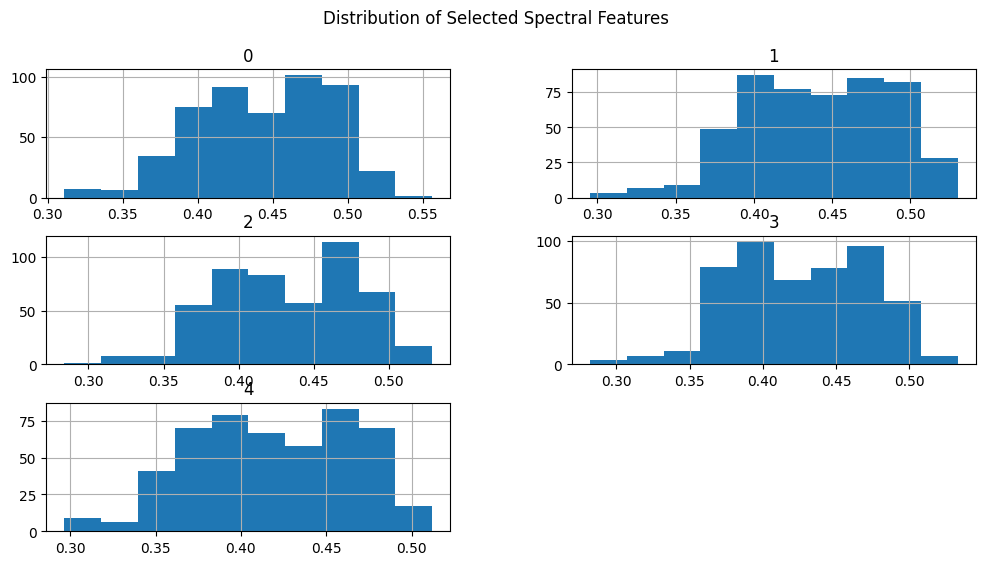

In [88]:
df.iloc[:,:5].hist(figsize=(12,6))
plt.suptitle("Distribution of Selected Spectral Features")
plt.show()

In [114]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


SCALING(EVEN THOUGH IT SEEMS SCALED)

In [115]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df.iloc[:,:-1]=scaler.fit_transform(df.iloc[:, :-1])

In [116]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.428384,0.432294,0.510485,0.361585,0.411656,0.365379,0.382911,0.305546,0.382076,0.475299,...,0.390543,0.372789,0.411477,0.372650,0.330556,0.324067,0.376234,0.340562,0.359537,1100.0
1,0.426816,0.458322,0.484244,0.453758,0.466945,0.478181,0.467686,0.401405,0.506341,0.466313,...,0.321045,0.315913,0.377114,0.346713,0.342318,0.282899,0.335534,0.337359,0.320439,1000.0
2,0.317584,0.323124,0.363833,0.365593,0.299035,0.292418,0.294413,0.246585,0.314003,0.296242,...,0.318514,0.237159,0.275166,0.291190,0.275842,0.225416,0.228563,0.265252,0.260075,1300.0
3,0.643212,0.757663,0.731006,0.705884,0.766564,0.804758,0.809852,0.703279,0.683790,0.719998,...,0.476533,0.410269,0.468494,0.441426,0.479585,0.446448,0.463770,0.501336,0.432737,1300.0
4,0.702433,0.817355,0.756362,0.818619,0.777502,0.764411,0.809995,0.764764,0.730135,0.802499,...,0.549142,0.529060,0.533219,0.534680,0.509626,0.461215,0.556841,0.517629,0.479541,220.0


PREPARING TO PLOT THE MEAN SPECTRAL REFLECTANCE(TO GAIN MORE INSIGHTS)

In [117]:
mean_spectral_reflectance=df.iloc[:, :-1].mean() #FINDING MEAN REFLECTANCE
mean_spectral_reflectance

,0
0,0.538283
1,0.619298
2,0.611948
3,0.573639
4,0.568235
...,...
443,0.448041
444,0.447094
445,0.452088
446,0.453203


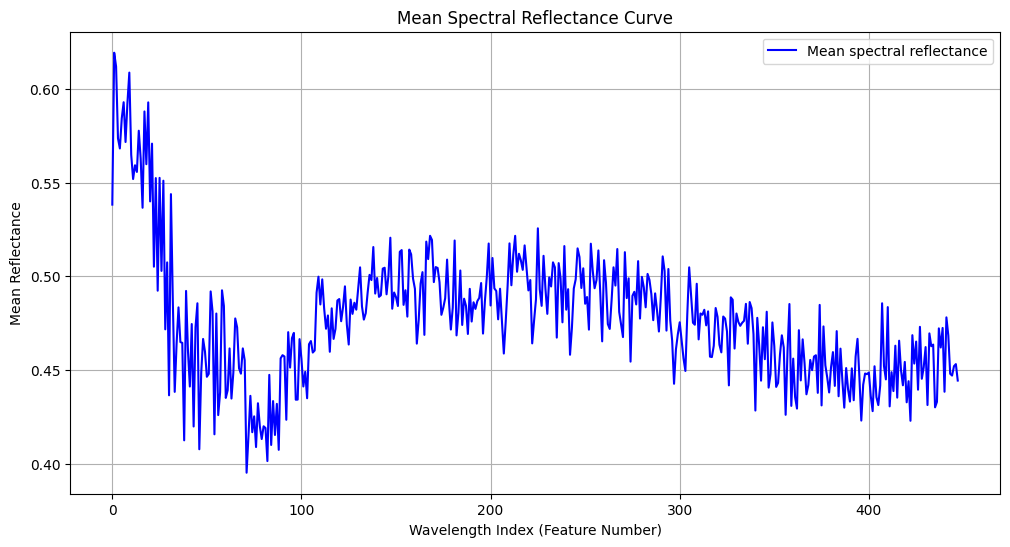

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(mean_spectral_reflectance)),mean_spectral_reflectance,label='Mean spectral reflectance',color='blue')
plt.xlabel("Wavelength Index (Feature Number)")
plt.ylabel("Mean Reflectance")
plt.title("Mean Spectral Reflectance Curve")
plt.legend()
plt.grid(True)
plt.show()

PLOTTING A CURVE BETWEEN HIGH AND LOW DON CONCENTRATION TO SEE HOW BOTH VARY WITH DIFFERENT WAVELENGTH


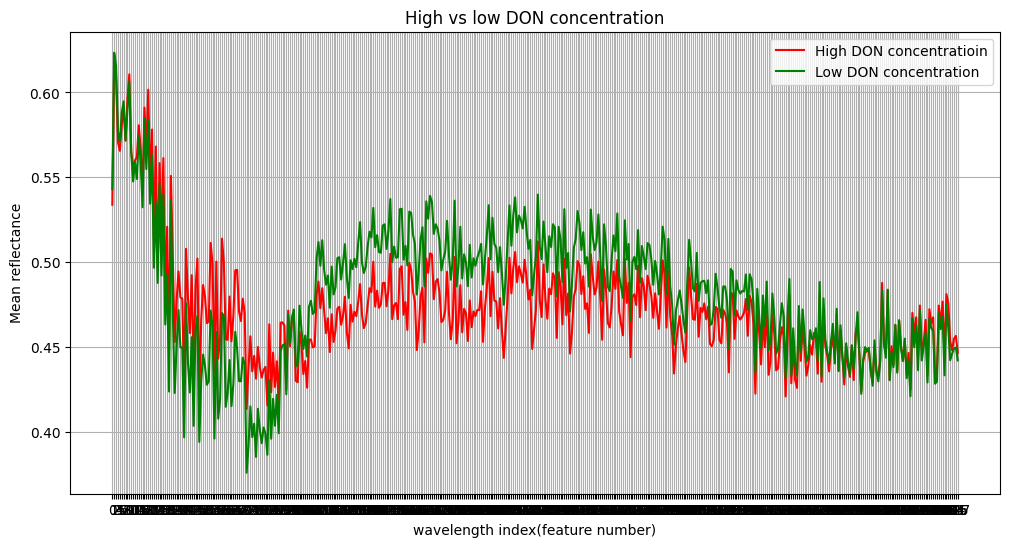

In [119]:
median_vomitoxin=df['vomitoxin_ppb'].median() #FINDING THE MEDIAN
high_don=df[df['vomitoxin_ppb']>=median_vomitoxin].iloc[:,:-1].mean()
low_don=df[df['vomitoxin_ppb']<median_vomitoxin].iloc[:,:-1].mean()
plt.figure(figsize=(12,6))
plt.plot(high_don,label="High DON concentratioin",color='red') #PLOTTING
plt.plot(low_don,label="Low DON concentration",color='green')
plt.xlabel("wavelength index(feature number)")
plt.ylabel("Mean reflectance")
plt.title("High vs low DON concentration")
plt.grid(True)
plt.legend()
plt.show()

PLOTTING A CORRELATION MATRIX BETWEEN ALL FEATURES AND VOMITOXIN

In [19]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x786c627a1800> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x786c6277b1a0> (for post_execute):


KeyboardInterrupt: 

FINDING THE TOP 10 CORRELATED FEATURES

In [120]:
feature_correlations=df.corr()['vomitoxin_ppb'].drop('vomitoxin_ppb').sort_values(ascending=False)
top_10_features=feature_correlations.abs().nlargest(10)
top_10_features

,vomitoxin_ppb
140,0.313444
135,0.307941
127,0.303796
143,0.302372
149,0.300649
146,0.300369
120,0.299075
152,0.298384
139,0.298224
129,0.298195


2.DIMENSIONALITY REDUCTION

USING PCA TO REDUCE DIMESNIONS(2) AND SEE HOW MUCH VARIANCE THESE TWO CAPTURE

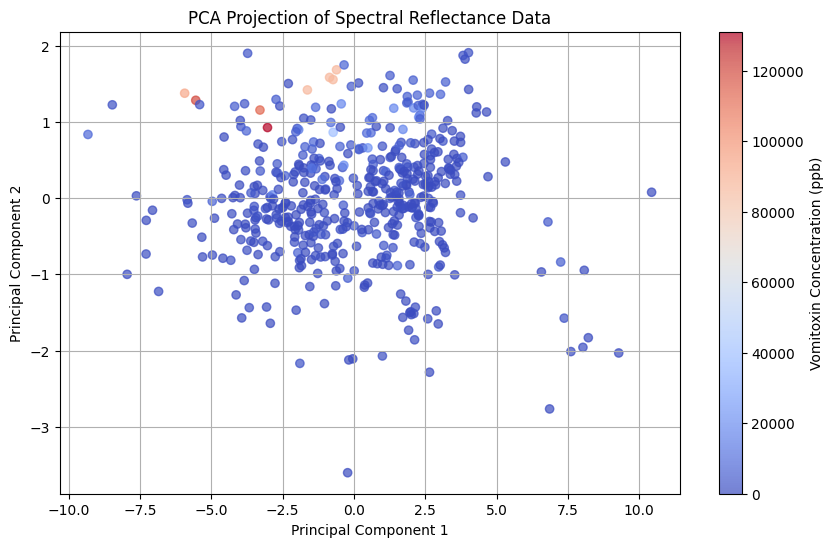

In [121]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_result=pca.fit_transform(df.iloc[:,:-1]) #PROJECTING THE ORIGINAL DATA IN THIS NEW 2D SPACE(WHILE EXCLUDING THE TARGET VARIABLE)
explained_variance = pca.explained_variance_ratio_
pca_df=pd.DataFrame({'PC1': pca_result[:,0],'PC2': pca_result[:,1],'vomitoxin_ppb': df['vomitoxin_ppb']})
plt.figure(figsize=(10, 6))
plot = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['vomitoxin_ppb'], cmap='coolwarm', alpha=0.7) #PLOTTING
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(plot, label="Vomitoxin Concentration (ppb)")
plt.title("PCA Projection of Spectral Reflectance Data")
plt.grid(True)
plt.show()




In [122]:
explained_variance #DISPLAYING THE VARIANCE CAPTURED BY THESE TWO COMPONENTS

array([0.8582386 , 0.06683037])

FINDING THE TOP 10 FEATURES THAT CONTRIBUTES TO THESE TWO PCA COMPONENTS

In [123]:
pca_full = PCA(n_components=10) #INITIALISING PCA WITH 10 COMPONENTS
pca_full.fit(df.iloc[:, :-1])  #EXCLUDING THE TARGET VARIABLE
pc1_importance = abs(pca_full.components_[0]) #GETTING THE CONTRIBUTION OF THE 10 FEATURES IN PC1
top_features_indices = pc1_importance.argsort()[::-1][:10]
top_features=pd.DataFrame({"Feature Index":top_features_indices,"Contribution to PC1":pc1_importance[top_features_indices]}) #CREATING A DF
top_features.head(10)

,Feature Index,Contribution to PC1
0,9,0.059059
1,7,0.058843
2,11,0.058316
3,10,0.058197
4,4,0.057702
5,5,0.057541
6,13,0.057448
7,12,0.055553
8,14,0.054955
9,341,0.054214


FINDING THEIR CORRELATION WITH TARGET

   Feature Index  Correlation with Target
0              9                -0.021581
1              7                -0.044674
2             11                -0.032310
3             10                -0.038275
4              4                -0.085876
5              5                -0.057492
6             13                -0.035052
7             12                -0.061969
8             14                -0.031515
9            341                -0.115692


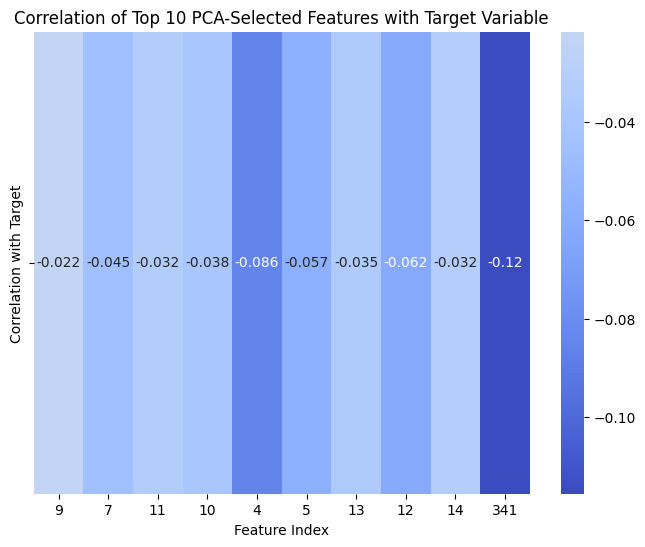

In [124]:
top_features=df.iloc[:,top_features_indices] #EXTRACTCING THE TOP FEATURES FROM MAIN DF
correlation_with_target=top_features.corrwith(df['vomitoxin_ppb']) #COMPUTING THE CORRELATION WITH TARGET VARIABLE
correlation_df=pd.DataFrame({"Feature Index": top_features_indices,"Correlation with Target": correlation_with_target.values})
print(correlation_df)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_df.set_index("Feature Index").T,cmap="coolwarm",annot=True,center=0)
plt.title("Correlation of Top 10 PCA-Selected Features with Target Variable")
plt.show()


NOW CHECKING WITH TSNE FOR FURTHER INSIGHTS

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


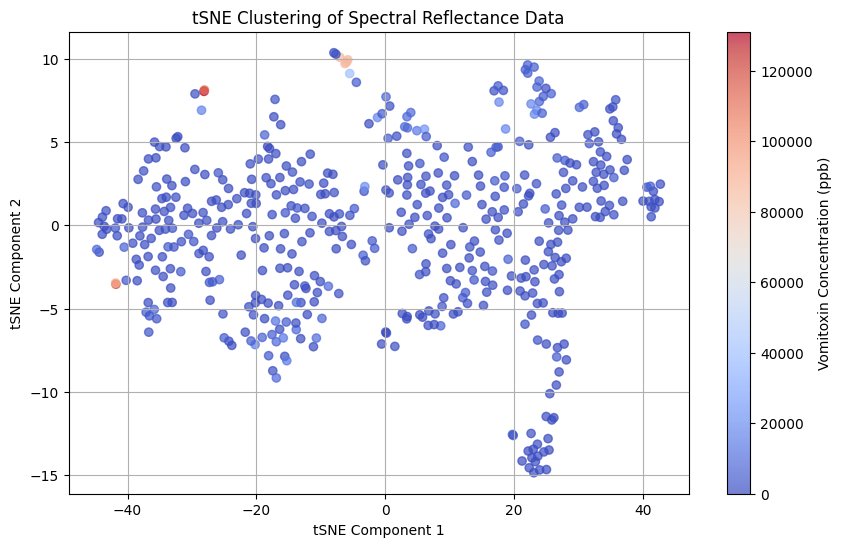

In [125]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=42,perplexity=30,n_iter=1000)
tsne_result=tsne.fit_transform(df.iloc[:, :-1]) #EXCLUDE THE TARGET VARIABLE
tsne_df = pd.DataFrame({'TSNE1': tsne_result[:, 0],'TSNE2': tsne_result[:, 1],'vomitoxin_ppb': df['vomitoxin_ppb']}) #CREATING A DF
plt.figure(figsize=(10,6))
scatter = plt.scatter(tsne_df['TSNE1'],tsne_df['TSNE2'],c=tsne_df['vomitoxin_ppb'],cmap='coolwarm',alpha=0.7)#PLOTTING
plt.colorbar(scatter, label="Vomitoxin Concentration (ppb)")
plt.xlabel("tSNE Component 1")
plt.ylabel("tSNE Component 2")
plt.title("tSNE Clustering of Spectral Reflectance Data")
plt.grid(True)
plt.show()


FINDING TOP 10 FEATURES USING RANDOM FOREST REGRESSOR

In [126]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42) #TRAINGING A RANDOM FOREST MODEL FOR SELCTING THE TOP FEATURES
rf_model.fit(df.iloc[:,:-1],df['vomitoxin_ppb'])
feature_importances=rf_model.feature_importances_
top_features_indices=np.argsort(feature_importances)[::-1][:10] #SORTING
important_features_df=pd.DataFrame({"Feature Index": top_features_indices,"Importance Score": feature_importances[top_features_indices]}) #STORING IN A DF
important_features_df.head(10)

,Feature Index,Importance Score
0,149,0.074117
1,136,0.069700
2,159,0.048671
3,123,0.043664
4,48,0.032713
5,160,0.032143
6,127,0.030841
7,140,0.017967
8,137,0.017011
9,124,0.015988


FINDING CORRELATION OF THESE TOP 10 FEATURES WITH TARGET VARIABLE

In [127]:
top_rf_feature_indices=[149,136,159,123,48,160,127,140,137,124] #MAKING A LIST OF TOP 10 FEATURES
rf_features_correlation=df.iloc[:, top_rf_feature_indices].corrwith(df['vomitoxin_ppb'])
rf_features_correlation_df=pd.DataFrame({"Feature Index": top_rf_feature_indices,"Correlation with Vomitoxin":rf_features_correlation.values}).sort_values(by="Correlation with Vomitoxin",ascending=False)
rf_features_correlation_df.head(10)

,Feature Index,Correlation with Vomitoxin
4,48,0.092803
2,159,-0.292335
8,137,-0.294551
9,124,-0.295049
1,136,-0.295601
5,160,-0.296617
3,123,-0.296665
0,149,-0.300649
6,127,-0.303796
7,140,-0.313444


3.MODEL SELECTION AND TRAINING

SPLITTING THE DATASET FOR TRAINING AND TESTING


In [129]:
x=df.iloc[:,:-1]  #TRAINING WITH ALL 447 FEATURES
y=df['vomitoxin_ppb']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)# SPLITTING THE DATASET FOR TRAINING (80%) AND TESTING(20%)

EVALUATION FUNCTION

In [130]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2=r2_score(y_true,y_pred)
    print(f"\nModel: {model_name}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

NEURAL NETWORK

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 86233672.0000 - mae: 2401.0168 - val_loss: 298660608.0000 - val_mae: 4380.2290
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 150597456.0000 - mae: 3410.7744 - val_loss: 296013216.0000 - val_mae: 4266.8525
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 223476944.0000 - mae: 3460.3025 - val_loss: 289927552.0000 - val_mae: 4887.3184
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 186144608.0000 - mae: 3912.7075 - val_loss: 288681888.0000 - val_mae: 5208.3770
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 194739632.0000 - mae: 4371.0244 - val_loss: 288435072.0000 - val_mae: 5213.2856
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 145878368.0000 - mae: 3815.4585 - val_loss: 288437664.0000 - val_mae: 5138.3423
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 89076280.0000 - mae: 3198.3584 - val_loss: 287939552.0000 - val_mae: 5252.6636
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 

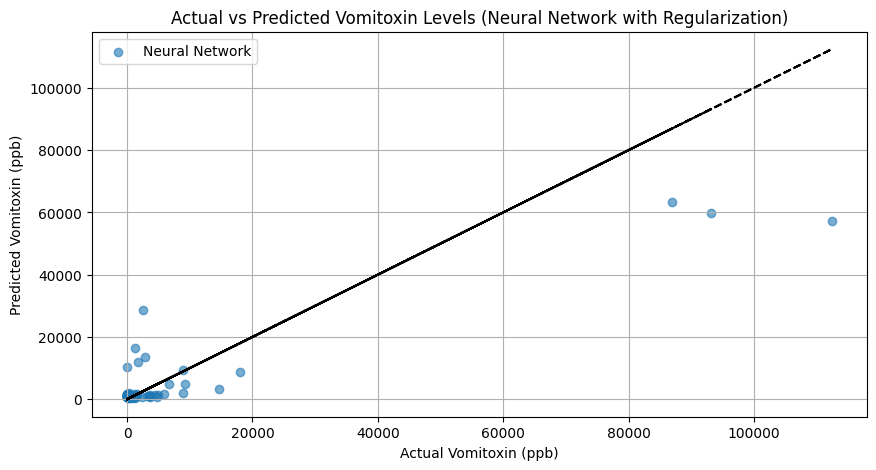

In [105]:
#NEURAL NET WITH DROPOUT AND L2 REGULARIZATION
model=keras.Sequential([
    keras.layers.Dense(256,activation='relu',input_shape=(x_train.shape[1],),kernel_regularizer=keras.regularizers.l2(0.001)),  #L2 REGULARIZATION
    keras.layers.Dropout(0.3),  # DROPOUT LAYER FOR OVERFITTING
    keras.layers.Dense(128,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1)  #OUTPUT LAYER FOR REGRESSION
])
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=16, callbacks=[early_stopping], verbose=1)
nn_preds = model.predict(x_test).flatten() #MAKE PREDICTIONS

#EVALUATE MODEL
evaluate_model(y_test, nn_preds, "Neural Network with Regularization")

plt.figure(figsize=(10, 5)) #PLOTTING
plt.scatter(y_test,nn_preds,label="Neural Network", alpha=0.6)
plt.plot(y_test,y_test,color='black', linestyle='dashed')
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs Predicted Vomitoxin Levels (Neural Network with Regularization)")
plt.legend()
plt.grid(True)
plt.show()


NEURAL NETWORK WITH HYPERPARAMETER TUNING USING RANDOM SEARCH

Reloading Tuner from tuner_results/vomitoxin_prediction/tuner0.json
Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 126869128.0000 - mae: 3284.3931 - val_loss: 287538976.0000 - val_mae: 5362.0713
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 110615648.0000 - mae: 3786.6489 - val_loss: 285952800.0000 - val_mae: 5018.4692
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 135013664.0000 - mae: 3713.6118 - val_loss: 279164384.0000 - val_mae: 5215.5522
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 271094912.0000 - mae: 5338.2061 - val_loss: 257189088.0000 - val_mae: 4322.5103
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 69951464.0000 - mae: 2537.5244 - val_loss: 273989408.0000 - val_mae: 4198.4292
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 101298440.0000 - mae: 2770.4785 - val_loss: 218908400.0000 - val_mae: 4409.6470
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 234886784.0000 - mae: 4718.6323 - val_loss: 227674096.0000 - val_mae: 3837.2715
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━

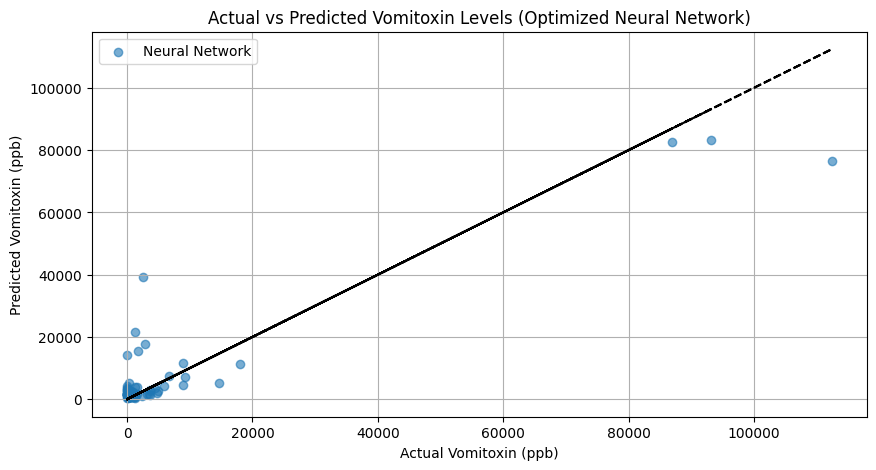

In [74]:
# FUNCTION TO BUILD MODEL WITH TUNABLE HYPERPARAMETERS
def build_model(hp):
    model = keras.Sequential()
    #FIRST HIDDEN LAYER
    model.add(keras.layers.Dense(
        units=hp.Int('units_1',min_value=64,max_value=512,step=64),
        activation='relu',
        input_shape=(X_train.shape[1],),
        kernel_regularizer=keras.regularizers.l2(hp.Choice('l2_1', [0.0001, 0.001, 0.01]))
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_1',min_value=0.1,max_value=0.5,step=0.1)))

    #SECOND HIDDEN LAYER
    model.add(keras.layers.Dense(
        units=hp.Int('units_2',min_value=64,max_value=256,step=64),
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(hp.Choice('l2_2', [0.0001, 0.001, 0.01]))
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_2',min_value=0.1,max_value=0.5,step=0.1)))

    #THIRD HIDDEN LAYER
    model.add(keras.layers.Dense(
        units=hp.Int('units_3', min_value=32, max_value=128, step=32),
        activation='relu',
        kernel_regularizer=keras.regularizers.l2(hp.Choice('l2_3',[0.0001, 0.001, 0.01]))
    ))
    model.add(keras.layers.Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    # OUTPUT LAYER
    model.add(keras.layers.Dense(1))

    #COMPLILING THE MODEL WITH TUNABLE LEARNING RATE
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mse',
        metrics=['mae']
    )

    return model

#USING KERAS TUNER TO DO RANDOM SEARCH AND FIND BEST HYPEPARAMETERS
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,  # NUMBER OF MODELS TO TRY
    executions_per_trial=2,  # NUMBER OF TIMES EACH MODEL IS TRAINED
    directory='tuner_results',
    project_name='vomitoxin_prediction'
)

#HYPERPARAMETER TUNING
tuner.search(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[
    keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
])

#SELECTING THE BEST HYPERPARAMETERS
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# TRAINING THE BEST MODEL
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=16, callbacks=[
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
], verbose=1)

#PREDICTING
nn_preds = best_model.predict(x_test).flatten()

# EVALUATION
evaluate_model(y_test, nn_preds, "Optimized Neural Network")

#PLOT
plt.figure(figsize=(10, 5))
plt.scatter(y_test, nn_preds, label="Neural Network", alpha=0.6)
plt.plot(y_test,y_test, color='black',linestyle='dashed')
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs Predicted Vomitoxin Levels (Optimized Neural Network)")
plt.legend()
plt.grid(True)
plt.show()


CNN

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 169ms/step - loss: 141834032.0000 - mae: 2722.2678 - val_loss: 298802560.0000 - val_mae: 4402.3638
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 197467376.0000 - mae: 3442.8337 - val_loss: 297961056.0000 - val_mae: 4366.0308
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - loss: 211337248.0000 - mae: 3995.1851 - val_loss: 295288960.0000 - val_mae: 4280.8857
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 91447048.0000 - mae: 2739.9495 - val_loss: 289980608.0000 - val_mae: 4229.2280
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 116257608.0000 - mae: 3333.2368 - val_loss: 286382400.0000 - val_mae: 4374.9517
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - loss: 246218032.0000 - mae: 4261.2710 - val_loss: 285504576.0000 - val_mae: 4298.2549
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - loss: 83865704.0000 - mae: 2819.1858 - val_loss: 282934688.0000 - val_mae: 4406.2036
Epoch 8/200
25/25 ━━━━━━━━━━━

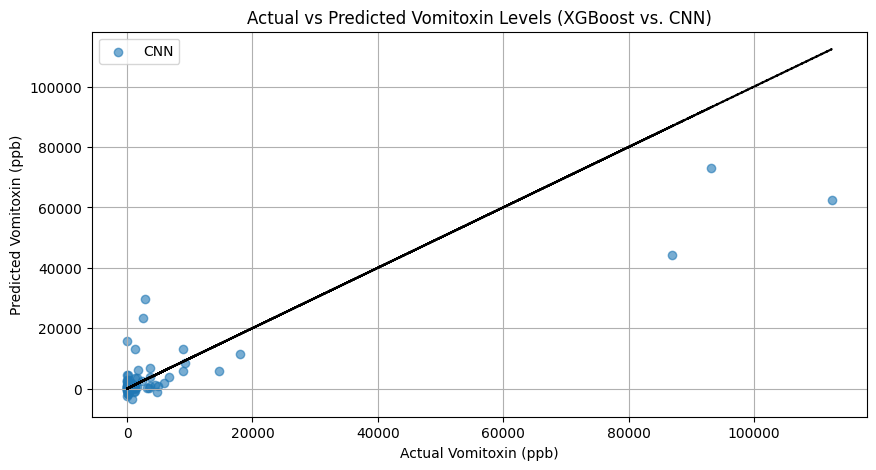

In [106]:
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization

x_train_cnn =x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

cnn_model = keras.Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train_cnn.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1)  #OUTPUT LAYER FOR REGRESSION
])

cnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_cnn = cnn_model.fit(x_train_cnn, y_train, validation_data=(x_test_cnn, y_test), epochs=200, batch_size=16, callbacks=[early_stopping], verbose=1)

cnn_preds = cnn_model.predict(x_test_cnn).flatten()
evaluate_model(y_test, cnn_preds, "CNN")

plt.figure(figsize=(10, 5))
plt.scatter(y_test, cnn_preds, label="CNN", alpha=0.6)
plt.plot(y_test, y_test, color='black', linestyle='dashed')
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs Predicted Vomitoxin Levels (CNN)")
plt.legend()
plt.grid(True)
plt.show()


OPTIMIZED CNN

Training CNN with Kernel=3, Dropout=0.2, Learning Rate=0.01
Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 185ms/step - loss: 241051680.0000 - mae: 4241.2627 - val_loss: 296470208.0000 - val_mae: 4265.5308
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 114075528.0000 - mae: 3231.7378 - val_loss: 292039296.0000 - val_mae: 4301.8838
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - loss: 103485624.0000 - mae: 3968.6521 - val_loss: 293326816.0000 - val_mae: 4234.7500
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 96627968.0000 - mae: 3460.4832 - val_loss: 295848832.0000 - val_mae: 4408.7402
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - loss: 59360808.0000 - mae: 3049.1479 - val_loss: 297322528.0000 - val_mae: 4517.0986
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 84880168.0000 - mae: 3416.5317 - val_loss: 284877856.0000 - val_mae: 4341.7998
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - loss: 55376796.0000 - mae: 3047.2222 - val_loss: 278558592.0000 - val_mae: 4096.6689
Epoch 8/100
13/13 ━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - loss: 122424024.0000 - mae: 2908.7183 - val_loss: 298944512.0000 - val_mae: 4411.0645
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - loss: 58876708.0000 - mae: 2155.6931 - val_loss: 298595136.0000 - val_mae: 4395.0142
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 173876464.0000 - mae: 3247.5708 - val_loss: 298306784.0000 - val_mae: 4382.1240
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 118425424.0000 - mae: 2975.5549 - val_loss: 297456832.0000 - val_mae: 4342.0435
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - loss: 159648976.0000 - mae: 3683.4912 - val_loss: 296290112.0000 - val_mae: 4292.2271
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 107610288.0000 - mae: 3156.6113 - val_loss: 296355840.0000 - val_mae: 4288.6445
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 177923008.0000 - mae: 3660.2136 - val_loss: 296479328.0000 - val_mae: 4292.1533
Epoch 8/100
13

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - loss: 143270240.0000 - mae: 3071.1929 - val_loss: 298970816.0000 - val_mae: 4411.1660
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - loss: 151591936.0000 - mae: 2913.7651 - val_loss: 298856000.0000 - val_mae: 4406.0210
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step - loss: 146155952.0000 - mae: 3151.8728 - val_loss: 298569504.0000 - val_mae: 4394.0015
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 245132016.0000 - mae: 3982.7749 - val_loss: 297956128.0000 - val_mae: 4366.4058
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - loss: 137209264.0000 - mae: 2963.7937 - val_loss: 296789472.0000 - val_mae: 4315.1870
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - loss: 117801528.0000 - mae: 2762.7412 - val_loss: 295562848.0000 - val_mae: 4277.7598
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - loss: 87187296.0000 - mae: 2686.2451 - val_loss: 294606880.0000 - val_mae: 4250.7319
Epoch 8/100
13/13 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - loss: 140035904.0000 - mae: 3157.6873 - val_loss: 295777376.0000 - val_mae: 4254.9839
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - loss: 95088048.0000 - mae: 3242.5493 - val_loss: 294917504.0000 - val_mae: 4239.3062
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 67327704.0000 - mae: 3248.0789 - val_loss: 284270464.0000 - val_mae: 4444.8975
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - loss: 108367152.0000 - mae: 4316.2817 - val_loss: 286857984.0000 - val_mae: 4328.3052
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - loss: 89368688.0000 - mae: 4098.9238 - val_loss: 287855360.0000 - val_mae: 4347.5439
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 54932368.0000 - mae: 3221.1365 - val_loss: 287883232.0000 - val_mae: 4385.5093
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 70090608.0000 - mae: 3633.9419 - val_loss: 295543904.0000 - val_mae: 4813.8745
Epoch 8/100
13/13 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - loss: 222699728.0000 - mae: 3716.1770 - val_loss: 298953216.0000 - val_mae: 4409.6211
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - loss: 137421888.0000 - mae: 3022.4194 - val_loss: 298737600.0000 - val_mae: 4396.5239
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 251994832.0000 - mae: 3973.7505 - val_loss: 298344032.0000 - val_mae: 4375.6602
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 174591216.0000 - mae: 3480.2607 - val_loss: 297450240.0000 - val_mae: 4334.4126
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - loss: 145422592.0000 - mae: 3377.9546 - val_loss: 296057184.0000 - val_mae: 4279.6484
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - loss: 141231216.0000 - mae: 3306.6951 - val_loss: 294889664.0000 - val_mae: 4246.8706
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 196011872.0000 - mae: 4040.8901 - val_loss: 293164928.0000 - val_mae: 4222.3804
Epoch 8/100
13/13 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - loss: 72249456.0000 - mae: 2443.2166 - val_loss: 298995584.0000 - val_mae: 4413.1519
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 166060960.0000 - mae: 3469.8989 - val_loss: 298914176.0000 - val_mae: 4410.7988
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 256443488.0000 - mae: 3739.3098 - val_loss: 298671360.0000 - val_mae: 4401.8584
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - loss: 191471168.0000 - mae: 3296.1074 - val_loss: 298071136.0000 - val_mae: 4379.5220
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 195ms/step - loss: 140136272.0000 - mae: 2797.3027 - val_loss: 296758016.0000 - val_mae: 4331.5752
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 246ms/step - loss: 192175984.0000 - mae: 3436.8311 - val_loss: 295113280.0000 - val_mae: 4285.8452
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 147822064.0000 - mae: 3076.5588 - val_loss: 293126496.0000 - val_mae: 4247.2402
Epoch 8/100
13/13 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - loss: 107210736.0000 - mae: 2806.2339 - val_loss: 297997504.0000 - val_mae: 4345.8442
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - loss: 124860224.0000 - mae: 3748.4548 - val_loss: 293648288.0000 - val_mae: 4244.2759
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 75058408.0000 - mae: 3019.7200 - val_loss: 292373056.0000 - val_mae: 4229.5469
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - loss: 76108056.0000 - mae: 3446.7842 - val_loss: 290170912.0000 - val_mae: 4243.8198
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 252ms/step - loss: 50663800.0000 - mae: 3016.0056 - val_loss: 291176768.0000 - val_mae: 4236.4111
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - loss: 79616296.0000 - mae: 3189.7539 - val_loss: 290942880.0000 - val_mae: 4214.3003
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - loss: 74183792.0000 - mae: 2810.1008 - val_loss: 294292928.0000 - val_mae: 4272.7485
Epoch 8/100
13/13 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 293ms/step - loss: 134765616.0000 - mae: 3038.9722 - val_loss: 298896512.0000 - val_mae: 4407.4346
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 232079296.0000 - mae: 3592.5830 - val_loss: 298601344.0000 - val_mae: 4394.8130
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - loss: 149278880.0000 - mae: 2928.5713 - val_loss: 298169184.0000 - val_mae: 4381.0054
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - loss: 83139704.0000 - mae: 2757.3984 - val_loss: 297297248.0000 - val_mae: 4343.6836
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 130595536.0000 - mae: 3060.5015 - val_loss: 296729696.0000 - val_mae: 4312.6626
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - loss: 61680664.0000 - mae: 2439.5046 - val_loss: 295578592.0000 - val_mae: 4265.2280
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 175855216.0000 - mae: 3746.5029 - val_loss: 296508320.0000 - val_mae: 4293.2637
Epoch 8/100
13/13 ━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - loss: 141415680.0000 - mae: 3103.1714 - val_loss: 298972832.0000 - val_mae: 4411.6880
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step - loss: 172254400.0000 - mae: 3233.2583 - val_loss: 298827200.0000 - val_mae: 4404.7515
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - loss: 125815568.0000 - mae: 2682.6401 - val_loss: 298468320.0000 - val_mae: 4390.1216
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 174285568.0000 - mae: 3194.1204 - val_loss: 297792608.0000 - val_mae: 4362.8638
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - loss: 106417640.0000 - mae: 2678.4885 - val_loss: 296447968.0000 - val_mae: 4313.5610
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - loss: 88548456.0000 - mae: 2826.0542 - val_loss: 294669696.0000 - val_mae: 4262.7954
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - loss: 149552064.0000 - mae: 3012.4429 - val_loss: 292255232.0000 - val_mae: 4236.3047
Epoch 8/100
13/13 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 65693380.0000 - mae: 2352.5649 - val_loss: 297013856.0000 - val_mae: 4288.9199
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 316ms/step - loss: 146663952.0000 - mae: 4402.9326 - val_loss: 294740256.0000 - val_mae: 4239.6968
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - loss: 110895728.0000 - mae: 3243.7031 - val_loss: 286471936.0000 - val_mae: 4719.6045
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 190ms/step - loss: 85032896.0000 - mae: 3469.8340 - val_loss: 290415328.0000 - val_mae: 4323.4897
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - loss: 56590064.0000 - mae: 3082.1499 - val_loss: 310537120.0000 - val_mae: 5744.6406
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - loss: 80667416.0000 - mae: 3233.3069 - val_loss: 277721824.0000 - val_mae: 5368.8096
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 73938864.0000 - mae: 3682.3926 - val_loss: 294997312.0000 - val_mae: 4506.9717
Epoch 8/100
13/13 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 294ms/step - loss: 189434832.0000 - mae: 3610.9114 - val_loss: 299035712.0000 - val_mae: 4421.0444
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - loss: 114782328.0000 - mae: 2732.8176 - val_loss: 298806688.0000 - val_mae: 4406.4561
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 212336544.0000 - mae: 3730.0371 - val_loss: 298230656.0000 - val_mae: 4387.2471
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - loss: 147922928.0000 - mae: 3434.0854 - val_loss: 296057568.0000 - val_mae: 4313.2920
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - loss: 194969504.0000 - mae: 4008.8613 - val_loss: 293832320.0000 - val_mae: 4234.0703
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 249ms/step - loss: 189611200.0000 - mae: 3764.1599 - val_loss: 293540128.0000 - val_mae: 4225.6377
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step - loss: 119555552.0000 - mae: 3062.2329 - val_loss: 296271616.0000 - val_mae: 4293.3105
Epoch 8/100
13/13 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - loss: 174431536.0000 - mae: 3554.8398 - val_loss: 298998048.0000 - val_mae: 4414.0610
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - loss: 140465856.0000 - mae: 2975.4312 - val_loss: 298885632.0000 - val_mae: 4409.4580
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 115375568.0000 - mae: 2790.1501 - val_loss: 298490048.0000 - val_mae: 4395.4824
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - loss: 150298992.0000 - mae: 3078.3921 - val_loss: 297735072.0000 - val_mae: 4365.0840
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 160273504.0000 - mae: 3476.6531 - val_loss: 296335488.0000 - val_mae: 4315.4917
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - loss: 109055784.0000 - mae: 2898.5625 - val_loss: 294400160.0000 - val_mae: 4245.6299
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 240ms/step - loss: 205089440.0000 - mae: 3904.4287 - val_loss: 292298784.0000 - val_mae: 4223.9468
Epoch 8/100
13/13 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 111683896.0000 - mae: 3251.6042 - val_loss: 295910528.0000 - val_mae: 4255.7217
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - loss: 178554608.0000 - mae: 4509.3223 - val_loss: 302152448.0000 - val_mae: 5162.5103
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - loss: 75025000.0000 - mae: 3135.3057 - val_loss: 293108576.0000 - val_mae: 4247.7627
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - loss: 111285096.0000 - mae: 4300.5278 - val_loss: 281327008.0000 - val_mae: 4172.1689
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 41881588.0000 - mae: 2808.1521 - val_loss: 288702944.0000 - val_mae: 4211.2876
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - loss: 76095336.0000 - mae: 3457.4900 - val_loss: 278271296.0000 - val_mae: 4297.3979
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - loss: 61950792.0000 - mae: 3370.2351 - val_loss: 284933376.0000 - val_mae: 4276.3623
Epoch 8/100
13/13 ━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - loss: 67754288.0000 - mae: 2558.1992 - val_loss: 298942656.0000 - val_mae: 4411.7949
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - loss: 187363952.0000 - mae: 3376.7678 - val_loss: 298893504.0000 - val_mae: 4411.4492
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - loss: 180952848.0000 - mae: 3141.5378 - val_loss: 298812256.0000 - val_mae: 4408.4258
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - loss: 174205008.0000 - mae: 3391.0793 - val_loss: 298580832.0000 - val_mae: 4400.9917
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - loss: 110705264.0000 - mae: 2994.2517 - val_loss: 297138272.0000 - val_mae: 4339.1157
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 285ms/step - loss: 86178136.0000 - mae: 2993.9468 - val_loss: 295633824.0000 - val_mae: 4269.4185
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - loss: 217448992.0000 - mae: 4137.8984 - val_loss: 298546816.0000 - val_mae: 4389.5249
Epoch 8/100
13/13 ━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - loss: 89389784.0000 - mae: 2454.6592 - val_loss: 298981152.0000 - val_mae: 4412.0908
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - loss: 107270576.0000 - mae: 2680.9912 - val_loss: 298890528.0000 - val_mae: 4408.8062
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 225ms/step - loss: 118135232.0000 - mae: 2619.6147 - val_loss: 298767104.0000 - val_mae: 4404.2827
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 145095248.0000 - mae: 2957.4241 - val_loss: 298728352.0000 - val_mae: 4404.7749
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 160348320.0000 - mae: 3552.2852 - val_loss: 298666880.0000 - val_mae: 4404.7417
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - loss: 191947184.0000 - mae: 3779.2778 - val_loss: 298532672.0000 - val_mae: 4402.5825
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - loss: 200346144.0000 - mae: 3818.9463 - val_loss: 298680128.0000 - val_mae: 4410.9707
Epoch 8/100
13/13 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 207ms/step - loss: 235730016.0000 - mae: 3967.8164 - val_loss: 295294208.0000 - val_mae: 4245.3877
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - loss: 159101760.0000 - mae: 3575.7908 - val_loss: 293959072.0000 - val_mae: 4236.1313
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - loss: 157888208.0000 - mae: 3953.6843 - val_loss: 292563328.0000 - val_mae: 4254.0039
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - loss: 124552512.0000 - mae: 3930.0930 - val_loss: 287941536.0000 - val_mae: 4208.6479
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - loss: 101009840.0000 - mae: 3188.4590 - val_loss: 288858144.0000 - val_mae: 4238.5610
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - loss: 95875808.0000 - mae: 3435.3379 - val_loss: 284604960.0000 - val_mae: 4246.9971
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - loss: 43383608.0000 - mae: 2863.9592 - val_loss: 284420288.0000 - val_mae: 4216.1157
Epoch 8/100
13/13 ━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - loss: 160940560.0000 - mae: 3283.5793 - val_loss: 298928000.0000 - val_mae: 4409.9702
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - loss: 243826816.0000 - mae: 3988.1423 - val_loss: 298651968.0000 - val_mae: 4402.3169
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - loss: 93639536.0000 - mae: 2578.9944 - val_loss: 297817280.0000 - val_mae: 4379.1777
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step - loss: 251332448.0000 - mae: 4191.7627 - val_loss: 296273728.0000 - val_mae: 4332.9102
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step - loss: 122278008.0000 - mae: 3441.6470 - val_loss: 292373600.0000 - val_mae: 4235.8979
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - loss: 169688576.0000 - mae: 3890.4485 - val_loss: 290701344.0000 - val_mae: 4243.6465
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - loss: 111636088.0000 - mae: 3361.2849 - val_loss: 291437184.0000 - val_mae: 4218.5405
Epoch 8/100
13/13 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 143193280.0000 - mae: 3020.8315 - val_loss: 298955232.0000 - val_mae: 4410.0591
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - loss: 163953184.0000 - mae: 3215.0767 - val_loss: 298796096.0000 - val_mae: 4402.0840
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - loss: 255188752.0000 - mae: 4122.9370 - val_loss: 298450112.0000 - val_mae: 4390.0786
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 183ms/step - loss: 114728864.0000 - mae: 2757.3245 - val_loss: 297599680.0000 - val_mae: 4354.7637
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 156867648.0000 - mae: 2881.5696 - val_loss: 296355008.0000 - val_mae: 4309.5605
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 242ms/step - loss: 116125440.0000 - mae: 2762.8667 - val_loss: 294566976.0000 - val_mae: 4258.9150
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - loss: 80605888.0000 - mae: 2539.6768 - val_loss: 291967616.0000 - val_mae: 4233.8545
Epoch 8/100
13/13 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - loss: 102876768.0000 - mae: 2920.8284 - val_loss: 295939392.0000 - val_mae: 4250.6782
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 278ms/step - loss: 203263296.0000 - mae: 4554.1313 - val_loss: 287207456.0000 - val_mae: 4268.1387
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 201ms/step - loss: 55181112.0000 - mae: 3068.8931 - val_loss: 300113760.0000 - val_mae: 4909.7539
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - loss: 97470112.0000 - mae: 3747.7029 - val_loss: 286256256.0000 - val_mae: 4388.1313
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - loss: 112158888.0000 - mae: 3415.9707 - val_loss: 288401664.0000 - val_mae: 4242.9302
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - loss: 59766056.0000 - mae: 3010.5791 - val_loss: 286971776.0000 - val_mae: 4393.5249
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 64281060.0000 - mae: 2735.6255 - val_loss: 280229568.0000 - val_mae: 4584.1187
Epoch 8/100
13/13 ━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - loss: 113653080.0000 - mae: 2738.0657 - val_loss: 298971936.0000 - val_mae: 4412.5762
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - loss: 271836832.0000 - mae: 3974.9753 - val_loss: 298756928.0000 - val_mae: 4395.6338
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - loss: 97307320.0000 - mae: 2798.2202 - val_loss: 298319232.0000 - val_mae: 4380.1333
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 215ms/step - loss: 190792448.0000 - mae: 3555.6748 - val_loss: 298153216.0000 - val_mae: 4367.3086
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 176073072.0000 - mae: 3973.6741 - val_loss: 297028576.0000 - val_mae: 4312.4575
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - loss: 123004640.0000 - mae: 3400.5134 - val_loss: 296871040.0000 - val_mae: 4291.8877
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - loss: 122417552.0000 - mae: 3353.6448 - val_loss: 297340448.0000 - val_mae: 4310.3330
Epoch 8/100
13

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 599ms/step - loss: 154636864.0000 - mae: 3208.3547 - val_loss: 298989184.0000 - val_mae: 4412.4248
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - loss: 224121072.0000 - mae: 3386.8569 - val_loss: 298860320.0000 - val_mae: 4402.5845
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - loss: 172892576.0000 - mae: 3219.8022 - val_loss: 298581280.0000 - val_mae: 4389.7852
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - loss: 142139392.0000 - mae: 3031.3933 - val_loss: 297870080.0000 - val_mae: 4359.2686
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - loss: 147390416.0000 - mae: 3028.5601 - val_loss: 296751936.0000 - val_mae: 4311.1841
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - loss: 167319440.0000 - mae: 3175.3574 - val_loss: 296259552.0000 - val_mae: 4297.5562
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - loss: 159424368.0000 - mae: 3621.6489 - val_loss: 294549120.0000 - val_mae: 4240.7573
Epoch 8/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - loss: 149412944.0000 - mae: 2905.6418 - val_loss: 295430912.0000 - val_mae: 4247.4927
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 227ms/step - loss: 120223376.0000 - mae: 3787.8496 - val_loss: 299019296.0000 - val_mae: 4480.2280
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 110643584.0000 - mae: 3686.8784 - val_loss: 285054080.0000 - val_mae: 4647.3330
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 300ms/step - loss: 104364216.0000 - mae: 3693.5303 - val_loss: 283560672.0000 - val_mae: 4546.5493
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 234ms/step - loss: 87239632.0000 - mae: 3553.1213 - val_loss: 289813728.0000 - val_mae: 4209.8398
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 113199056.0000 - mae: 3535.7017 - val_loss: 277417568.0000 - val_mae: 6035.9512
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - loss: 74847216.0000 - mae: 3413.2705 - val_loss: 275447840.0000 - val_mae: 4315.4258
Epoch 8/100
13/13 ━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - loss: 99526552.0000 - mae: 2480.2739 - val_loss: 298735904.0000 - val_mae: 4397.9268
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 203ms/step - loss: 121042432.0000 - mae: 2790.5964 - val_loss: 297805120.0000 - val_mae: 4346.5488
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - loss: 201009856.0000 - mae: 3497.1279 - val_loss: 296260096.0000 - val_mae: 4270.3735
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - loss: 140295072.0000 - mae: 3315.2371 - val_loss: 294567008.0000 - val_mae: 4234.0630
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - loss: 151004144.0000 - mae: 3328.9297 - val_loss: 294293984.0000 - val_mae: 4232.5220
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 302ms/step - loss: 195159280.0000 - mae: 3930.5703 - val_loss: 294878624.0000 - val_mae: 4237.4146
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 203ms/step - loss: 209724496.0000 - mae: 4183.4561 - val_loss: 295648352.0000 - val_mae: 4248.1313
Epoch 8/100
13/13 ━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - loss: 112101088.0000 - mae: 2674.3452 - val_loss: 299010400.0000 - val_mae: 4414.1875
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 411ms/step - loss: 150884112.0000 - mae: 3169.3848 - val_loss: 298992384.0000 - val_mae: 4412.2876
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - loss: 140214176.0000 - mae: 3017.0864 - val_loss: 298912288.0000 - val_mae: 4412.5371
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - loss: 120009592.0000 - mae: 2810.2449 - val_loss: 298754400.0000 - val_mae: 4408.4316
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - loss: 189727552.0000 - mae: 3474.6675 - val_loss: 298242976.0000 - val_mae: 4393.6860
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - loss: 284640416.0000 - mae: 4775.8042 - val_loss: 296803872.0000 - val_mae: 4350.5610
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 316ms/step - loss: 117411568.0000 - mae: 3340.7737 - val_loss: 294740512.0000 - val_mae: 4291.1533
Epoch 8/100
13/13 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - loss: 147556752.0000 - mae: 3159.9167 - val_loss: 294340480.0000 - val_mae: 4304.1528
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - loss: 141196816.0000 - mae: 4321.9995 - val_loss: 292653632.0000 - val_mae: 4281.6245
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - loss: 103336968.0000 - mae: 3155.4873 - val_loss: 295256896.0000 - val_mae: 4371.4365
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - loss: 101915712.0000 - mae: 3190.3042 - val_loss: 291866976.0000 - val_mae: 4240.5684
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - loss: 108204232.0000 - mae: 3830.4995 - val_loss: 291264608.0000 - val_mae: 4266.4199
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 78640824.0000 - mae: 3304.0171 - val_loss: 297929920.0000 - val_mae: 4797.9453
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 355ms/step - loss: 86489864.0000 - mae: 3486.7092 - val_loss: 283028480.0000 - val_mae: 4150.3032
Epoch 8/100
13/13 ━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - loss: 94934184.0000 - mae: 2655.3760 - val_loss: 298983648.0000 - val_mae: 4413.9668
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - loss: 67385376.0000 - mae: 2357.5999 - val_loss: 298781888.0000 - val_mae: 4410.0283
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - loss: 176052192.0000 - mae: 3681.5054 - val_loss: 298588704.0000 - val_mae: 4412.0703
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - loss: 165575216.0000 - mae: 3587.9839 - val_loss: 296930560.0000 - val_mae: 4360.7949
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - loss: 89065560.0000 - mae: 2916.0518 - val_loss: 292239776.0000 - val_mae: 4227.4160
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 91492072.0000 - mae: 3115.5977 - val_loss: 288925728.0000 - val_mae: 4348.8218
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 218ms/step - loss: 78670248.0000 - mae: 3042.8176 - val_loss: 290236032.0000 - val_mae: 4277.2925
Epoch 8/100
13/13 ━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 518ms/step - loss: 204607264.0000 - mae: 3513.8276 - val_loss: 298991904.0000 - val_mae: 4413.0889
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 351ms/step - loss: 196816656.0000 - mae: 3473.1982 - val_loss: 298963840.0000 - val_mae: 4414.4355
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 268ms/step - loss: 113937048.0000 - mae: 2959.3892 - val_loss: 298723904.0000 - val_mae: 4408.0410
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 204ms/step - loss: 127985128.0000 - mae: 2831.9641 - val_loss: 298147616.0000 - val_mae: 4389.0430
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 226ms/step - loss: 171774336.0000 - mae: 3318.6902 - val_loss: 296858496.0000 - val_mae: 4347.9473
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - loss: 75556720.0000 - mae: 2362.2483 - val_loss: 294772928.0000 - val_mae: 4271.3950
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - loss: 126086632.0000 - mae: 3234.4712 - val_loss: 292397376.0000 - val_mae: 4230.3242
Epoch 8/100
1

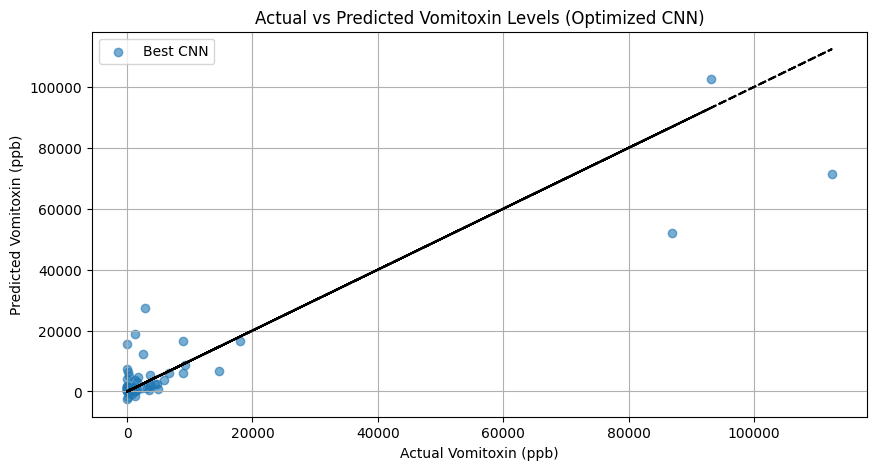

In [70]:
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

x = x.reshape(x.shape[0],x.shape[1], 1)  # 1D CNN INPUT SHAPE
#HYPERPARAMETRS
kernel_sizes = [3, 5, 7]
dropout_rates = [0.2, 0.3, 0.4]
learning_rates = [0.01, 0.001, 0.0005]

best_model = None
best_score = float('-inf')  #TRACK THE HIGHEST R2 SCORE

#GRID SEARCH OVER HYPERPARAMETERS
for kernel_size in kernel_sizes:
    for dropout_rate in dropout_rates:
        for lr in learning_rates:
            print(f"Training CNN with Kernel={kernel_size},Dropout={dropout_rate},Learning Rate={lr}")
            model = keras.Sequential([
                Conv1D(filters=64, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)),
                BatchNormalization(),
                Dropout(dropout_rate),

                Conv1D(filters=128, kernel_size=kernel_size, activation='relu'),
                BatchNormalization(),
                Dropout(dropout_rate),

                Flatten(),
                Dense(64, activation='relu'),
                Dropout(dropout_rate),

                Dense(1)
            ])
            optimizer = Adam(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

            #TRAINING THE MODEL WITH EARLY STOPPING
            early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                                epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

            #MAKING PREDICTIONS
            cnn_preds = model.predict(X_test).flatten()

            #EVALUATING THE MODEL
            mae = mean_absolute_error(y_test, cnn_preds)
            rmse = np.sqrt(mean_squared_error(y_test, cnn_preds))
            r2 = r2_score(y_test, cnn_preds)

            print(f"\nCNN (Kernel={kernel_size}, Dropout={dropout_rate}, LR={lr}) -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

            #STORING THE BEST MODEL
            if r2 > best_score:
                best_score = r2
                best_model = model
                best_params = {'kernel_size': kernel_size, 'dropout_rate': dropout_rate, 'learning_rate': lr}

print("\nBest CNN Hyperparameters:", best_params)
final_preds = best_model.predict(X_test).flatten()

#EVALUATING THE BEST MODEL
mae = mean_absolute_error(y_test, final_preds)
rmse = np.sqrt(mean_squared_error(y_test, final_preds))
r2 = r2_score(y_test, final_preds)
print(f"\nFinal Best CNN Model -> MAE: {mae:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

#PLOTTING
plt.figure(figsize=(10, 5))
plt.scatter(y_test, final_preds, label="Best CNN", alpha=0.6)
plt.plot(y_test, y_test, color='black', linestyle='dashed')
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs Predicted Vomitoxin Levels (Optimized CNN)")
plt.legend()
plt.grid(True)
plt.show()


SAVING THE BEST MODEL

In [ ]:
best_model.save('best_vomitoxin_model.h5')